### <font color='blue'>1. Imports</font>

https://www.kaggle.com/giripujar/hr-analytics/tasks?taskId=3330

https://www.youtube.com/watch?v=zM4VZR0px8E

#### <font color='brown'>Examples</font>

https://www.kaggle.com/naimamushfika/hr-analysis-by-logistic-regression#Feature-Selection:

https://www.kaggle.com/rashikrahmanpritom/hr-analytics-and-modeling


#### <font color='brown'>LGBM</font>

https://www.kaggle.com/prashant111/lightgbm-classifier-in-python

#### <font color='brown'>KNN</font>

https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, brier_score_loss

In [2]:
path = 'D:\\Meus Documentos\\Python\\Notebooks\\Datascience\\Classification_datascience\\'
dataset = pd.read_csv('{}HR_comma_sep.csv'.format(path))

In [3]:
feature_types = {
    'satisfaction_level': 'binary (0 or 1)',
    'Work_accident': 'probability (0 ~ 1)',
    'time_spend_company': 'cardinal (2,3,4,5,6,7,8,9,10)',
    'average_montly_hours': 'continuous (100,200,300)',
    'promotion_last_5years': 'binary (0 or 1)',
    'number_project': 'cardinal (2,3,4,5,6,7)',
    'salary': 'quality (low, medium, high)',
    'department': 'quality (TI, management, etc)'
}

### <font color='blue'>2. Exploratory analysis</font>

In [4]:
(dataset.corr())["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

### <font color='blue'> Checking for missing values</font>

In [5]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### <font color='blue'> Data types</font>

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### <font color='blue'>2.1 Employee salaries vs retention</font>

<AxesSubplot:xlabel='salary'>

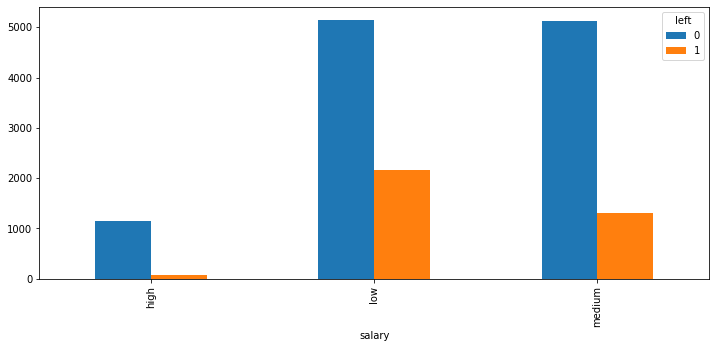

In [7]:
pd.crosstab(dataset.salary,dataset.left).plot(kind='bar', figsize=(12,5))

### <font color='blue'>2.2 Employee department vs retention</font>

<AxesSubplot:xlabel='Department'>

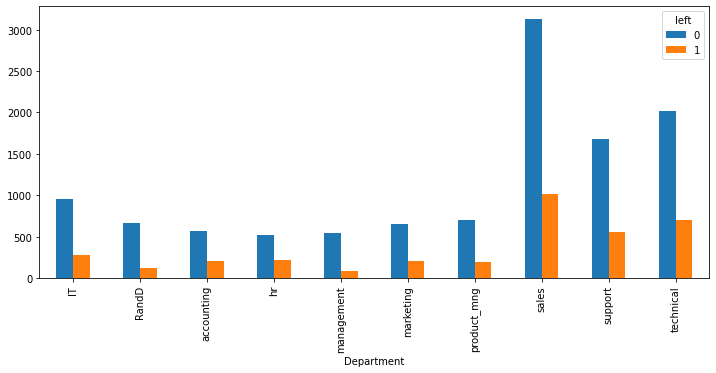

In [8]:
pd.crosstab(dataset.Department,dataset.left).plot(kind='bar', figsize=(12,5))

### <font color='blue'>2.3 Creating dummies</font>

In [9]:
dataset = pd.get_dummies(dataset, columns=['salary', 'Department'])

### <font color='blue'>3. Selecting features</font>

In [10]:
X = dataset.drop(['left'], axis='columns')
Y = dataset.left

In [11]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

dt.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [12]:
feature_column = []
feature_value = []

for i, column in enumerate(X):
    print('The feature importance for {} is {}'.format(column, round(dt.feature_importances_[i]*100, 2)))
    feature_column.append(column)
    feature_value.append(dt.feature_importances_[i])
    
feature_df = pd.DataFrame(zip(feature_column, feature_value), columns=['Feature', 'Feature Importance'])
feature_df = feature_df.sort_values('Feature Importance', ascending = False).reset_index()

The feature importance for satisfaction_level is 36.9
The feature importance for last_evaluation is 13.44
The feature importance for number_project is 19.26
The feature importance for average_montly_hours is 8.04
The feature importance for time_spend_company is 21.51
The feature importance for Work_accident is 0.09
The feature importance for promotion_last_5years is 0.0
The feature importance for salary_high is 0.24
The feature importance for salary_low is 0.09
The feature importance for salary_medium is 0.06
The feature importance for Department_IT is 0.04
The feature importance for Department_RandD is 0.0
The feature importance for Department_accounting is 0.07
The feature importance for Department_hr is 0.09
The feature importance for Department_management is 0.0
The feature importance for Department_marketing is 0.0
The feature importance for Department_product_mng is 0.0
The feature importance for Department_sales is 0.13
The feature importance for Department_support is 0.03
The f

In [13]:
feature_df

,index,Feature,Feature Importance
0,0,satisfaction_level,0.369030
1,4,time_spend_company,0.215142
2,2,number_project,0.192638
3,1,last_evaluation,0.134442
4,3,average_montly_hours,0.080384
5,7,salary_high,0.002448
6,17,Department_sales,0.001278
7,13,Department_hr,0.000917
8,8,salary_low,0.000884
9,5,Work_accident,0.000856


### <font color='blue'>4. Using features</font>

In [14]:
selected_features = feature_df['Feature'][0:13]

In [15]:
selected_features

0        satisfaction_level
1        time_spend_company
2            number_project
3           last_evaluation
4      average_montly_hours
5               salary_high
6          Department_sales
7             Department_hr
8                salary_low
9             Work_accident
10    Department_accounting
11            salary_medium
12            Department_IT
Name: Feature, dtype: object

In [16]:
X = dataset[selected_features]
X

,satisfaction_level,time_spend_company,number_project,last_evaluation,average_montly_hours,salary_high,Department_sales,Department_hr,salary_low,Work_accident,Department_accounting,salary_medium,Department_IT
0,0.38,3,2,0.53,157,0,1,0,1,0,0,0,0
1,0.80,6,5,0.86,262,0,1,0,0,0,0,1,0
2,0.11,4,7,0.88,272,0,1,0,0,0,0,1,0
3,0.72,5,5,0.87,223,0,1,0,1,0,0,0,0
4,0.37,3,2,0.52,159,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,3,2,0.57,151,0,0,0,1,0,0,0,0
14995,0.37,3,2,0.48,160,0,0,0,1,0,0,0,0
14996,0.37,3,2,0.53,143,0,0,0,1,0,0,0,0
14997,0.11,4,6,0.96,280,0,0,0,1,0,0,0,0


In [17]:
Y = dataset.left
Y = Y.astype(int)
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int32

### <font color='blue'>5. Splitting train and test</font>

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=15)

Text(0.5, 0, 'train')

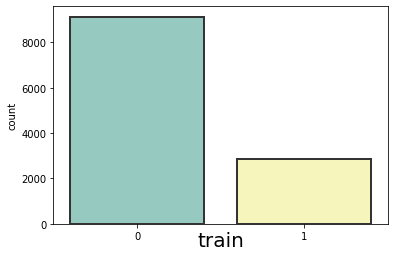

In [19]:
ax = sns.countplot(x=Y_train, palette='Set3', linewidth=2.0, edgecolor=".2", zorder=3)
plt.xlabel('train', fontsize=20, labelpad=-10)

Text(0.5, 0, 'test')

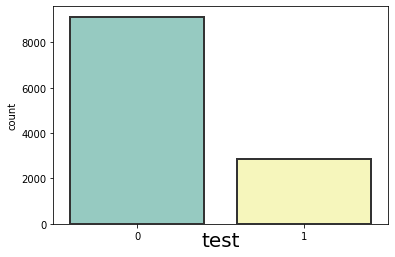

In [20]:
ax = sns.countplot(x=Y_train, palette='Set3', linewidth=2.0, edgecolor=".2", zorder=3)
plt.xlabel('test', fontsize=20, labelpad=-10)

### <font color='blue'>6. Logistic Regression</font>

In [21]:
log_reg = LogisticRegression(C=0.91, random_state=15, solver = 'liblinear')
log_reg.fit(X_train, Y_train)

LogisticRegression(C=0.91, random_state=15, solver='liblinear')

### <font color='blue'>7. Decision Tree</font>

In [22]:
tree = DecisionTreeClassifier(criterion="entropy", max_features=8, max_depth=88).fit(X_train, Y_train)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=88, max_features=8)

### <font color='blue'>8. KNN</font>

In [23]:
knn = KNeighborsClassifier(n_neighbors=2, p=8)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2, p=8)

### <font color='blue'>9. Light BGM</font>

In [24]:
LGBM = lightgbm.LGBMClassifier()
LGBM.fit(X_train, Y_train)

LGBMClassifier()

### <font color='blue'>Evaluating model </font>

### <font color='blue'>Code for metric analytics </font>

In [25]:
def get_model_metrics(func, data_table:dict):    
    x_train = data_table['x_train']
    y_train = data_table['y_train']
    x_test = data_table['x_test']
    y_test = data_table['y_test']
    
    metric_dict = {}
    train_accuracy = func.score(x_train, y_train)
    test_accuracy = func.score(x_test, y_test)

    metric_dict["train_accuracy"] = train_accuracy
    metric_dict["test_accuracy"] = test_accuracy
    
    Y_pred = func.predict(x_train)
    pred_proba = func.predict_proba(X_train)
    pred_proba_test = func.predict_proba(X_test)
    
    cm = confusion_matrix(y_train, Y_pred)
    metric_dict["confusion_matrix"] = cm

    pred_proba_test = func.predict_proba(x_test)
    metric_dict["log_loss_train"] = log_loss(y_train, pred_proba)
    metric_dict["log_loss_test"] = log_loss(y_test, pred_proba_test)

    metric_dict["brier_score_train"] = brier_score_loss(y_train, pd.DataFrame(pred_proba)[0])
    metric_dict["brier_score_test"] = brier_score_loss(y_test, pd.DataFrame(pred_proba_test)[0])
    
    return metric_dict

### <font color='blue'>Parameters </font>

In [26]:
dataset_dict = {"x_train": X_train, "y_train": Y_train, "x_test": X_test, "y_test": Y_test}

model_list = [log_reg, tree, knn, LGBM]
metrics_list = [get_model_metrics(i, dataset_dict) for i in model_list]
model_names = ["Logistic regression", "Decision Tree", "K-neighbours", "LGBM"]

# <font color='blue'>MODEL PRECISION </font>

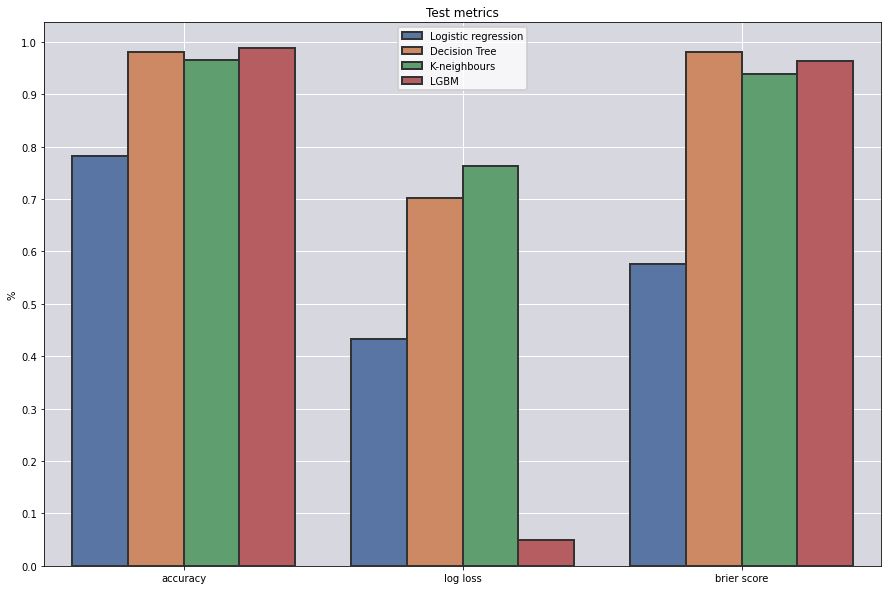

In [27]:
plt.figure(figsize = (15,10))

mn = model_names
gmt = ["accuracy", "log loss", "brier score"]

d = {
    'x':    [gmt[0], gmt[0],  gmt[0], gmt[0],
             gmt[1], gmt[1], gmt[1], gmt[1],
             gmt[2], gmt[2], gmt[2], gmt[2]],
    
    'y':    [metrics_list[0]["test_accuracy"], metrics_list[1]["test_accuracy"], metrics_list[2]["test_accuracy"], metrics_list[3]["test_accuracy"],
             metrics_list[0]["log_loss_test"], metrics_list[1]["log_loss_test"], metrics_list[2]["log_loss_test"], metrics_list[3]["log_loss_test"],
             metrics_list[0]["brier_score_test"], metrics_list[1]["brier_score_test"], metrics_list[2]["brier_score_test"], metrics_list[3]["brier_score_test"]],
    
    'group':[mn[0], mn[1], mn[2], mn[3],
             mn[0], mn[1], mn[2], mn[3],
             mn[0], mn[1], mn[2], mn[3]]
}

sns.set_context(rc = {'patch.linewidth': 2.0})
ax = sns.barplot(x='x', y='y', hue="group", data=d, linewidth=2.0, edgecolor=".2", zorder=3, palette=sns.color_palette("deep"))

plt.ylabel('%')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.1))

ax.grid(linewidth=1, color='white', zorder=0)
ax.set_facecolor("#d7d7e0")
plt.title("Test metrics")
plt.show()

# <font color='blue'>OVERFITTING </font>

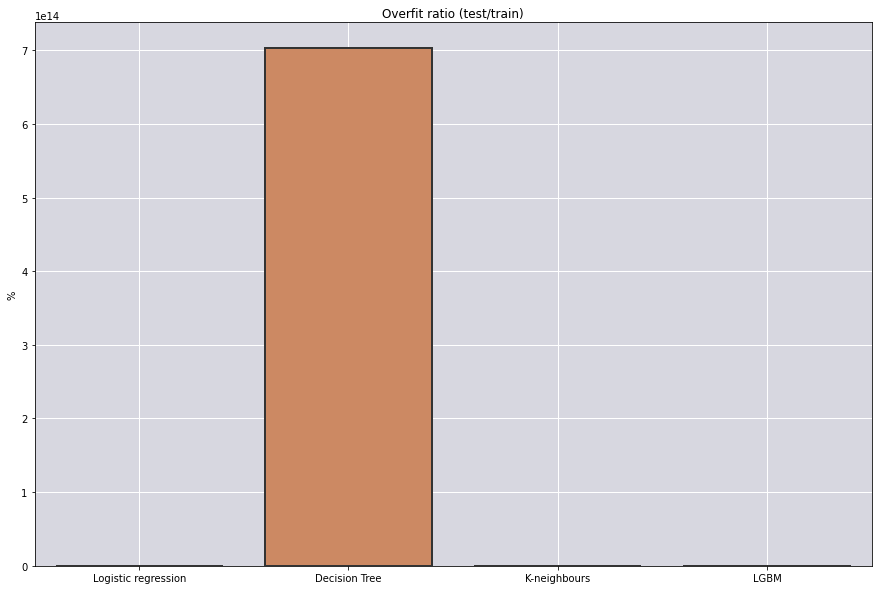

In [28]:
dict(zip(model_names, metrics_list))

overfit_dict = {}

for i in zip(model_names, metrics_list):
    aux = ((i[1]["log_loss_test"] - i[1]["log_loss_train"]) / i[1]["log_loss_train"])
    overfit_dict[i[0]] = str(aux)

keys = list(overfit_dict.keys())
vals = [float(overfit_dict[k][:-1]) for k in keys]
overfit_dict

plt.figure(figsize = (15,10))

sns.set_context(rc = {'patch.linewidth': 1.0})
ax = sns.barplot(x=keys, y=vals, linewidth=2.0, edgecolor=".2", zorder=3, palette=sns.color_palette("deep"))

plt.ylabel('%')
ax.grid(linewidth=1, color='white', zorder=0)
ax.set_facecolor("#d7d7e0")
plt.title("Overfit ratio (test/train)")
plt.show()

# <font color='blue'>CONFUSION MATRIX </font>

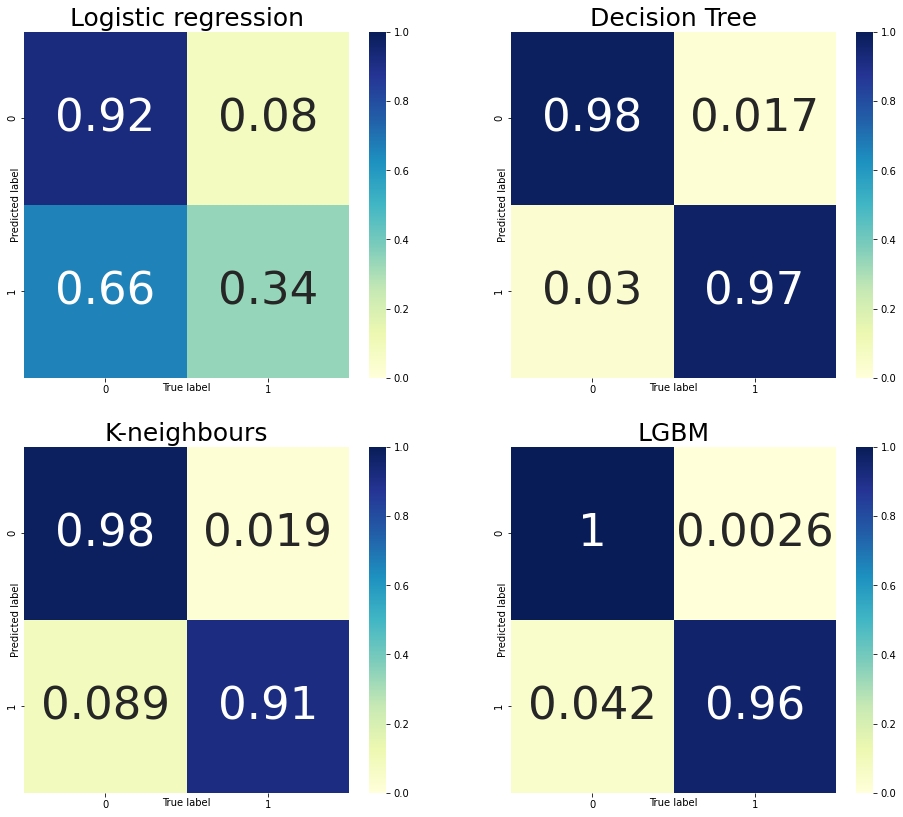

In [29]:
plt.figure(figsize = (16,14))

model_names_size = 25

cm_list = [confusion_matrix(Y_test, func.predict(X_test)) for func in model_list]
cm_list = [(cm/cm.sum(axis=1).reshape(-1,1)) for cm in cm_list]

ax1 = plt.subplot(2,2,1)
sns.heatmap(cm_list[0], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[0], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax1.xaxis.set_label_coords(0.5, -0.015)
ax1.yaxis.set_label_coords(-0.01, 0.5)

ax2 = plt.subplot(2,2,2)
sns.heatmap(cm_list[1], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[1], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax2.xaxis.set_label_coords(0.5, -0.015)
ax2.yaxis.set_label_coords(-0.01, 0.5)

ax3 = plt.subplot(2,2,3)
sns.heatmap(cm_list[2], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[2], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax3.xaxis.set_label_coords(0.5, -0.015)
ax3.yaxis.set_label_coords(-0.01, 0.5)

ax4 = plt.subplot(2,2,4)
sns.heatmap(cm_list[3], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[3], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax4.xaxis.set_label_coords(0.5, -0.015)
ax4.yaxis.set_label_coords(-0.01, 0.5)
